# LINEAR REGRESSION

## Multiple Linear Regression

By fitting a linear equation to observed data, Multiple Linear Regression aims to model the relationship between two or more characteristics/features and a response/target variable.

Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn <br />
Y = Dependent variable and x1, x2, x3, ……<br />
xn = Multiple independent variables 

## Assumption of Regression Model 
- **Linearity**: The relationship between dependent and independent variables should be linear.
- **Homoscedasticity**: Constant variance of the errors should be maintained.
- **Multivariate normality**: Multiple Regression assumes that the residuals are normally distributed.
- **Lack of Multicollinearity**: It is assumed that there is little or no multicollinearity in the data.

## Steps in MLR
1. Reading and understanding the data
2. Preparing the data for modelling
3. Training the model
4. Residual Analysis
5. Predictions and evaluation on the test set


### Step 1: Reading and understanding the data

In [1]:
# Import the libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
# Read the data 
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Shape of the dataset
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Outlier detection**: There is no difference between the mean value and median value. Therefore, we can infer that there are no outliers.

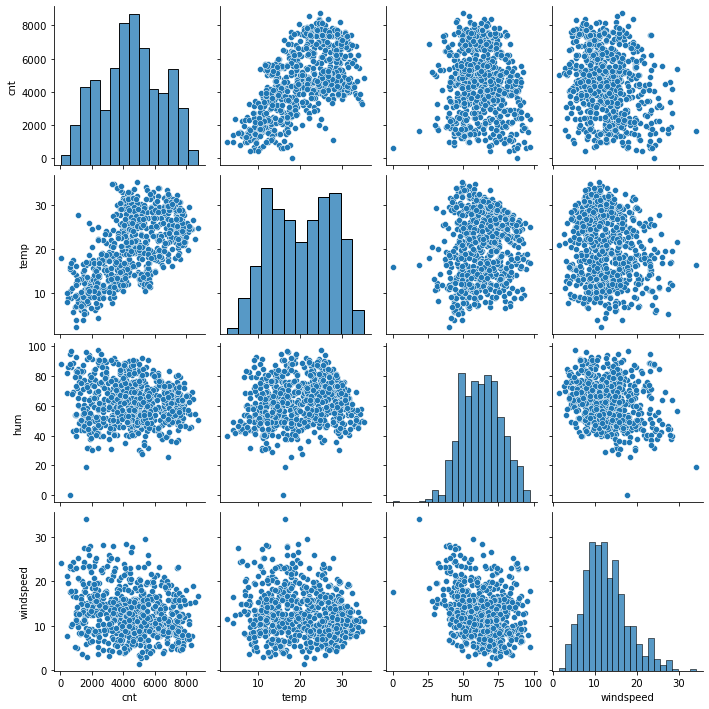

In [7]:
# Visualise the numerical data

sns.pairplot(data=day, vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

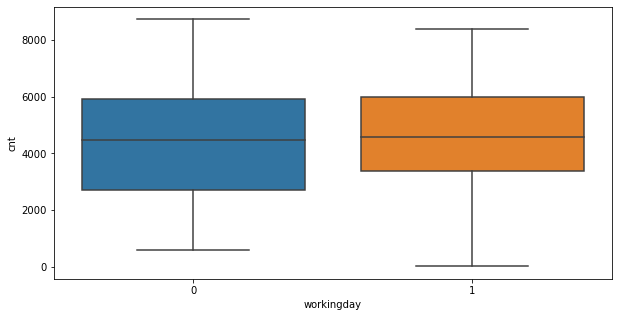

In [8]:
# Visualise the categorical data - workingday

plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

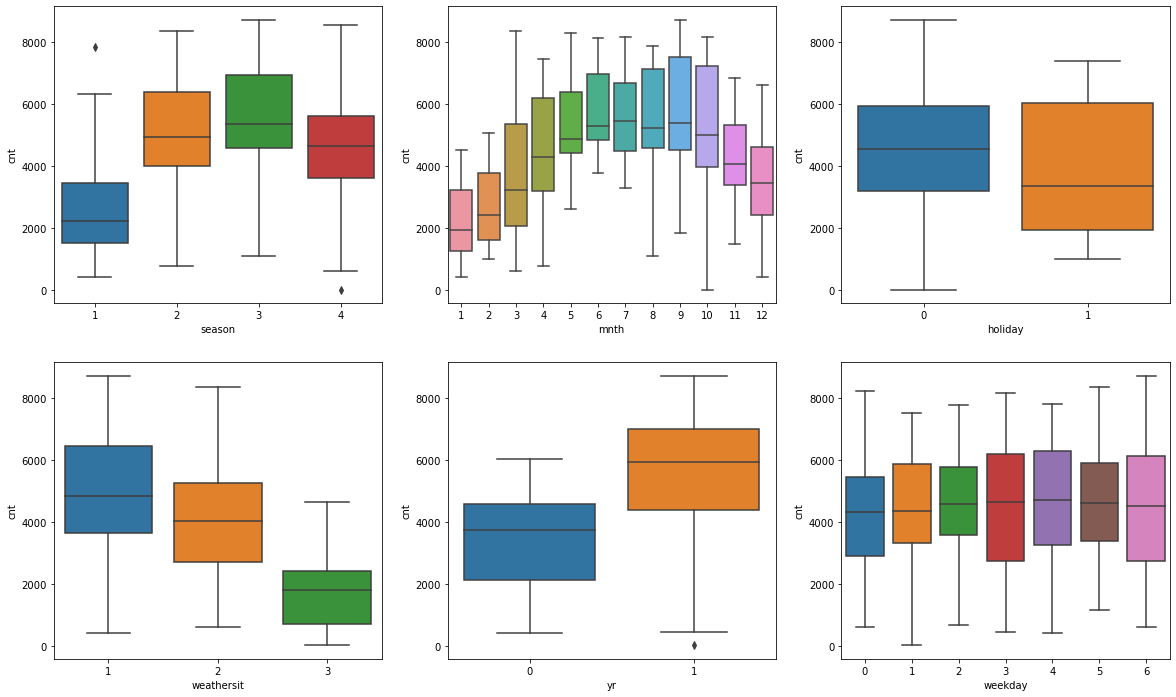

In [9]:
# Visualise the categorical data by creating subplots

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.show()

From the above plots, we can understand the following pointers:

- **Workingday**: Not much of a difference is since between a day in the weekend or holiday and a regular weekday.
- **Season**: The demand for bikes is low during spring and considerably high in fall (1:spring, 2:summer, 3:fall, 4:winter).
- **Year**: The bike selling demand has a very good incline in 2019.
- **Month** - Bikes are rented more in the middle of the year (June, July, Aug, Sept) when compared to its ends (Nov, Dec, Jan, Feb).
- **Holiday** - The counter is a little higher on a regular day than on a holiday (0: holiday, 1: regular day).
- **Weekday** - Bikes are rented almost equally throughout the week.
- **Weather situation** - Of the 4 categories given in the dataset, category 1 has the highest demand and category 4 has no statistics to present.
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

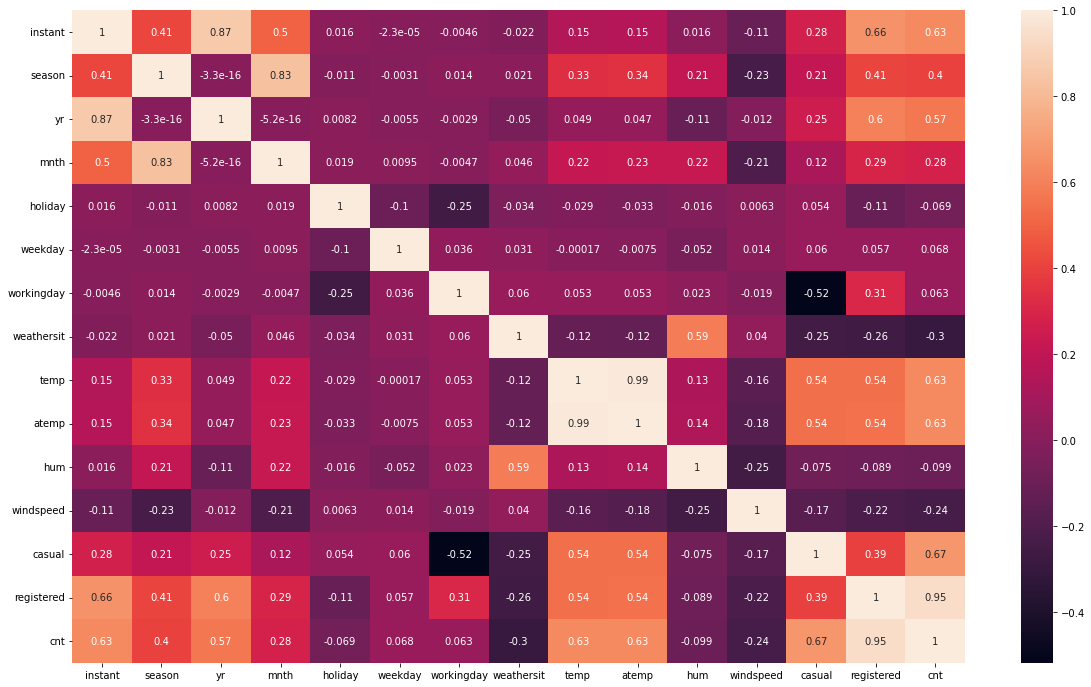

In [10]:
# Understand the correlations

plt.figure(figsize=(20, 12))
sns.heatmap(day.corr(), annot=True)
plt.show()

From the above heatmap, we can conclude that the features season, temperature, month, casual and registered have the highest correleation with the cnt variable (target variable)

### Step 2: Preparing the data for modelling

By understanding the data dictionary, we see that the below variables are

1. Numerical - instant, temp, atemp, hum, windspeed, casual, registered and cnt <br />
2. Categorical - dteday, season, yr, mnth, holiday, weekday, workingday, weathersit <br />

We can drop a couple of columns for the following reasons:

- **instant**: as this will only provide the index of the rows, we can omit it
- **casual & registered**: the column 'cnt' contains the sum of these 2 variables which provides the nucesssary information and avoiding redundant features.
- **atemp**: We have a similar variable called temp, we can drop this too.

In [11]:
# Dropping unnecessary columns

day.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Since the dataset has numbers assigned to each category of the multiple features, we would need to map them for data interpretation purposes.

In [12]:
# Mapping the column 'season'

day.season = day.season.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Mapping the column 'month'

#day.mnth=day.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:' Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
#day.head()

import calendar
day['mnth'] =day['mnth'].apply (lambda x: calendar.month_abbr[x])
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Mapping the column 'weekday'
#Note: As per the actual calender, when weekday and date is matched, Tuesday is 0 and Monday is 6.

day.weekday = day.weekday.map({0:"Tuesday", 1:"Wednesday", 2:"Thursday", 3:"Friday", 4:"Saturday", 5:"Sunday", 6:"Monday"})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Mapping the column 'weather situation'

day.weathersit = day.weathersit.map({1:'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Snow'})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Creating dummy variables from categorical variables

dum = day[['season', 'mnth', 'weekday', 'weathersit']]
dum = pd.get_dummies(dum, drop_first=True )

In [17]:
# Concatenating dummy variables to the dataset

day = pd.concat([dum, day],axis = 1)
day.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Shape of the new dataset
day.shape

(730, 34)

In [19]:
# Variables from which dummy variables were created can be dropped

day.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
day.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
day.shape

(730, 30)

In [21]:
# Train- Test split
# Train - 70 and test - 30

train, test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)
print(train.shape)
print(test.shape)

(510, 30)
(219, 30)


In [22]:
# Rescaling the data to bring them all to a standard format

scaler = MinMaxScaler()
num_var = ['cnt', 'hum', 'windspeed', 'temp']

train[num_var] = scaler.fit_transform(train[num_var])
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,23.0423,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973


In [23]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,23.493909,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,8.090038,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,24.020400,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000


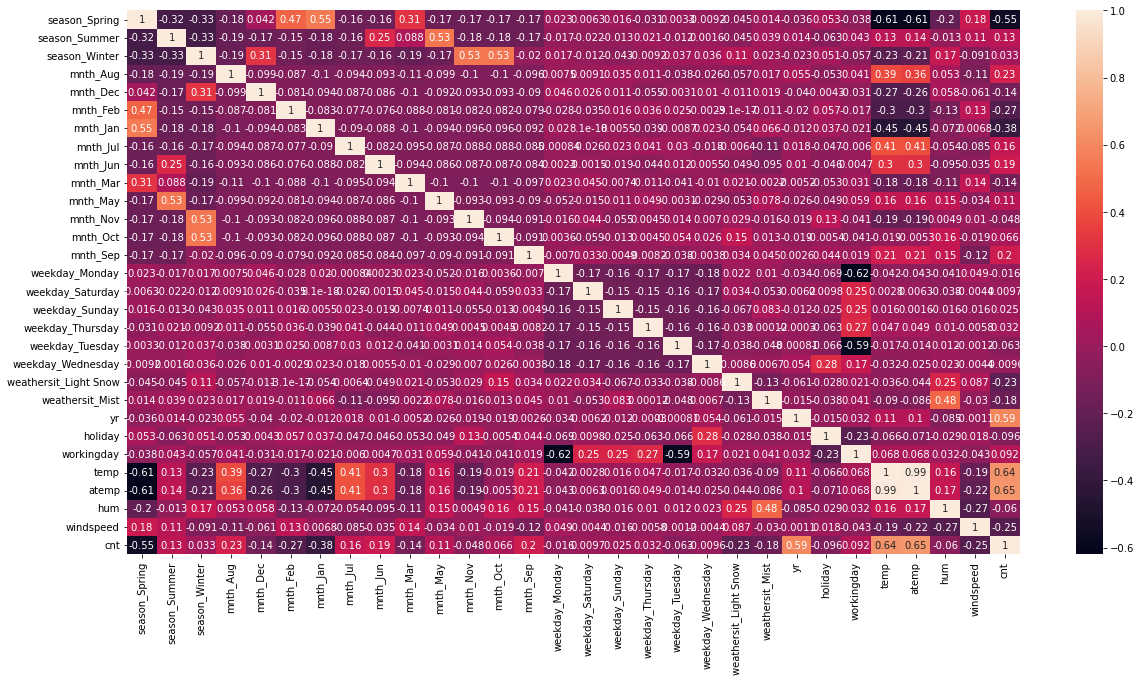

In [24]:
# Replotting the heatmap to check the correlations

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()

Looking at the above heatmap, the column temperature has the highest correlation with the 'cnt' (target variable) = 0.65.

### Step 3: Building/training the model

In [25]:
# Removing the target variable and spliting into X and y sets

y_train = train.pop('cnt')
X_train = train

**Variable selection using RFE (Recursive Feature Elimination)** - automated process <br />
RFE is an efficient approach for eliminating features from a training dataset for feature selection. <br />
RFE is a utility from sklearn.

In [26]:
# Creating an object of class LinearRegression
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Running RFE with the output number of variables equal to 13
# Running RFE
rfe = RFE(lm, 13)            
rfe = rfe.fit(X_train, y_train)

# Lets now zip the data
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 14),
 ('weekday_Sunday', False, 13),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 16),
 ('hum', True, 1),
 ('windspeed', True, 1)]

- Support - Tells us if a particular feature is selected or not. True: picked; false: not picked
- Ranking - Represents the importance of a feature. 1 being the highest and goes up as the importance reduces.

In [27]:
# Select all the columns with the argument support = True

col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Monday', 'weathersit_Light Snow',
       'weathersit_Mist', 'yr', 'holiday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [28]:
# To understand those columns which are not picked by RFE

X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

In [29]:
# Building the model using statsmodel.

X_train_rfe = X_train[col]

# Add a constant feature
# Note: In statsmodel library,  the intercept 'c' value is not included. Hence, we have to explicitly add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Run the LR model
lm = sm.OLS(y_train,X_train_rfe).fit()

# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.51e-190
Time:                        21:40:12   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2796      0.035      8.096      0.000       0.212       0.348
season_Spring            -0.0563      0.021     -2.701      0.007      -0.097      -0.015
season_Summer             0.0521      0.015      3.472      0.001       0.023       0.082
season_Winter             0.0984      0.017      5.706      0.000       0.065       0.132
mnth_Jul                 -0.0579      0.018     -3.162      0.002      -0.094      -0.022
mnth_Sep                  0.0828      0.017      4.952      0.000       0.050       0.116
weekday_Monday            0.0175      0.011      1.575      0.116      -0.004       0.039
weathersit_Light Snow    -0.2395      0.026     -9.090      0.000      -0.291      -0.188
weathersit_Mist          -0.0547      0.011     -5.211      0.000      -0.075      -0.034
yr                        0.2298      0.008     28.298      0.000       0.214       0.246
holiday                  -0.0945      0.026     -3.690      0.000      -0.145      -0.044
temp                      0.5306      0.034     15.779      0.000       0.465       0.597
hum                      -0.1681      0.038     -4.450      0.000      -0.242      -0.094
windspeed                -0.1831      0.026     -7.120      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       63.307   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.410
Skew:                          -0.685   Prob(JB):                     1.45e-30
Kurtosis:                       5.143   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When the number of variables is set to 14 or 15, all the p-values were less than 0.05. When reduced it to 13, determined a feature which could be dropped.

In [30]:
# Looking at the above table, the p-values greater than 0.05 can be dropped. Hence, dropping the variable weekday_Monday
# 1st iteration/model

X_train_new = X_train_rfe.drop(["weekday_Monday"], axis = 1)
X_train_new.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weathersit_Light Snow,weathersit_Mist,yr,holiday,temp,hum,windspeed
653,1.0,0,0,1,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,1.0,0,0,0,1,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,1,0,0.395666,0.504508,0.188475


In [31]:
# Rebuild the model after eliminating 1 variable 
X_train_lm = sm.add_constant(X_train_new)

# Run the LR model
lm = sm.OLS(y_train,X_train_lm).fit()   

# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.69e-190
Time:                        21:40:12   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2841      0.034      8.242      0.000       0.216       0.352
season_Spring            -0.0562      0.021     -2.695      0.007      -0.097      -0.015
season_Summer             0.0519      0.015      3.457      0.001       0.022       0.081
season_Winter             0.0987      0.017      5.719      0.000       0.065       0.133
mnth_Jul                 -0.0575      0.018     -3.140      0.002      -0.094      -0.022
mnth_Sep                  0.0830      0.017      4.962      0.000       0.050       0.116
weathersit_Light Snow    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
weathersit_Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
yr                        0.2293      0.008     28.219      0.000       0.213       0.245
holiday                  -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                      0.5300      0.034     15.739      0.000       0.464       0.596
hum                      -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                -0.1819      0.026     -7.066      0.000      -0.233      -0.131
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
X_train_new.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist', 'yr', 'holiday',
       'temp', 'hum', 'windspeed'],
      dtype='object')

From the above summary, we see that all the p-values are above 0.05.

In [33]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.49
2,season_Summer,2.61
11,hum,1.90
7,weathersit_Mist,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow,1.24


In [34]:
# Dropping the const variable to calculate the VIFs again 

X_train_new = X_train_new.drop(['const'], axis=1)
X_train_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weathersit_Light Snow,weathersit_Mist,yr,holiday,temp,hum,windspeed
653,0,0,1,0,0,0,0,1,0,0.509887,0.575354,0.300794
576,0,0,0,1,0,0,0,1,0,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,1,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,1,0,0.395666,0.504508,0.188475


In [35]:
# Calculate VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.06
9,temp,16.02
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.35
1,season_Summer,2.78
6,weathersit_Mist,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


The variable 'season_Spring' has the highest VIF, while the variable 'holiday' has the least.

In [36]:
# Dropping variable 'hum' as it has the highest VIF
X_train_new = X_train_new.drop(['hum'], axis=1)

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train, X_train_lm).fit()   

# Check the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.40e-187
Time:                        21:40:12   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1996      0.030      6.758      0.000       0.142       0.258
season_Spring            -0.0669      0.021     -3.167      0.002      -0.108      -0.025
season_Summer             0.0453      0.015      2.971      0.003       0.015       0.075
season_Winter             0.0831      0.017      4.818      0.000       0.049       0.117
mnth_Jul                 -0.0524      0.019     -2.811      0.005      -0.089      -0.016
mnth_Sep                  0.0767      0.017      4.511      0.000       0.043       0.110
weathersit_Light Snow    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
weathersit_Mist          -0.0816      0.009     -9.301      0.000      -0.099      -0.064
yr                        0.2335      0.008     28.361      0.000       0.217       0.250
holiday                  -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                      0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                -0.1480      0.025     -5.893      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Recalculating the VIF values for the newly created model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.21
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
6,weathersit_Mist,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow,1.08


After dropping a couple of variables which either had high p-values or high VIFs or both, we can conclude that the model explains 83.6% (adjusted R-Squared = 0.836) variance of the train dataset.

### Step 4: Residual Analysis

Building a model on the training dataset has 2 parts:

- fitting a line
- validating the assumptions of regression

Text(0.5, 0, 'Errors')

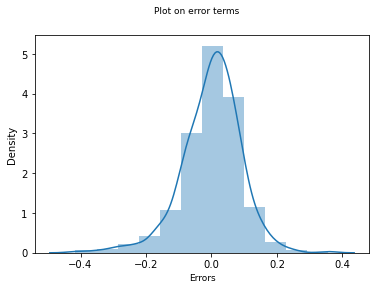

In [38]:
# Validating error terms
# Error = f(y_train, y_train_pred)

y_train_cnt = lm.predict(X_train_lm)

# Plot the residuals
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 12)
fig.suptitle('Plot on error terms', fontsize = 9)                 
plt.xlabel('Errors', fontsize = 9)       

This is the distribution of the error terms (y_train and y_train_pred). The distribution should be such that it is centered around zero and it is approximately normal. This is seen in the above histogram.

### Step 5: Predictions and evaluation on the test set

Using the final model obtained on the train dataset, we can verify if the same result will be obtained on the test dataset by predicting and evaluating the test set.

In [39]:
# Predictions on the test set (y_test_pred)
# Scaling the test dataset

num_var = ['cnt', 'hum', 'windspeed', 'temp']
test[num_var] = scaler.transform(test[num_var])

In [40]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow,weathersit_Mist,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,24.255828,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,8.299641,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,17.085500,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,24.873150,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,31.155725,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300


In [41]:
# Removing the target variable and spliting into X and y sets

y_test = test.pop('cnt')
X_test = test

# Add a constant feature to X_test
X_test = sm.add_constant(X_test)

In [42]:
# Predicting values using the final training dataset model
test_colm = X_train_lm.columns
X_test=X_test[test_colm[1:]]

# Add constant variable 
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   season_Spring          219 non-null    uint8  
 2   season_Summer          219 non-null    uint8  
 3   season_Winter          219 non-null    uint8  
 4   mnth_Jul               219 non-null    uint8  
 5   mnth_Sep               219 non-null    uint8  
 6   weathersit_Light Snow  219 non-null    uint8  
 7   weathersit_Mist        219 non-null    uint8  
 8   yr                     219 non-null    int64  
 9   holiday                219 non-null    int64  
 10  temp                   219 non-null    float64
 11  windspeed              219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [43]:
# Making predictions 

y_pred = lm.predict(X_test)

In [44]:
# Calculating the R2-score

r2_score(y_test, y_pred)

0.8049418440982381

In [45]:
# Calculating the Mean Squared Error

MSE  = mean_squared_error(y_test, y_pred)
print(MSE)

0.009264444750858145


Text(0, 0.5, 'y_pred')

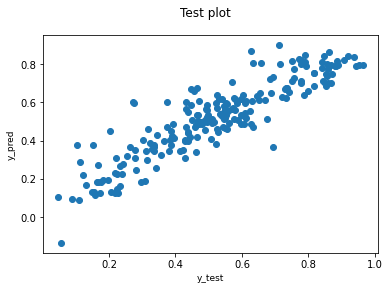

In [46]:
# Plotting a graph to understand the distribution of y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('Test plot', fontsize = 12)              
plt.xlabel('y_test', fontsize = 9)                         
plt.ylabel('y_pred', fontsize = 9)      

In [47]:
paras = pd.DataFrame(lm.params)
paras.insert(0, 'Variables', paras.index)
paras.rename(columns = {0:'Coefficient values'}, inplace = True)
paras['index'] = list(range (0,12))
paras.set_index('index', inplace = True)
paras.sort_values(by = 'Coefficient values', ascending = False, inplace = True)
paras

,Variables,Coefficient values
index,,
10,temp,0.491508
8,yr,0.233482
0,const,0.199648
3,season_Winter,0.083084
5,mnth_Sep,0.076686
2,season_Summer,0.045280
4,mnth_Jul,-0.052418
1,season_Spring,-0.066942
7,weathersit_Mist,-0.081558


### Conclusion

We have a R-squared value of 86.66 % on train data and 83.4% on test data.
Based on the above table, we can understand that temperature is the highest significant variables and decreases as you move down the table.

Equation of best fit line can be calculated by using the standard formla:

cnt = const + feature1 x co-efficient1 + feature2 x co-efficient + .......... + feature'n' x co-efficient'n'

All of the positive coefficients, such as temp,season Summer, suggest that when these values rise, so will the value of cnt. <br  />
All of the negative coefficients indicate that increasing these values will cause the value of cnt to decrease. <br />

- With the biggest coefficient, temperature is the most significant.
- Followed by weathersit Light Snow.
- Bike rentals are more significant in September.
- During the holidays, rental rates are lower.